In [42]:
# 检测curve_fit的方式能不能拟合一个正确的椭圆
"""首先画出带噪声的随机点，其次是画出拟合的图像
TODO 最主要的困难是拟合不出来，列出了公式但是没用
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_r, y_r = None, None

def get_oval(noise_factor=0.1, num = 400, params=(0, 0, 4, 2, np.pi / 6)): 
    """获得带噪声的椭圆点"""

    # 定义椭圆参数
    center = (params[0], params[1])  # 椭圆中心
    width = params[2]        # 椭圆的长轴长度
    height = params[3]        # 椭圆的短轴长度
    angle = params[4]          # 椭圆的旋转角度（度数）

    # 生成椭圆的参数方程
    theta = np.linspace(0, np.pi*2, num)  # 角度范围
    x = center[0] + width * np.cos(theta)
    y = center[1] + height * np.sin(theta)

    # 添加随机噪声
    # noise_factor = 0.1  # 噪声因子，可以根据需要调整
    x += np.random.normal(0, noise_factor, x.shape)
    y += np.random.normal(0, noise_factor, y.shape)

    # 旋转椭圆
    # theta_rad = np.radians(angle)
    theta_rad = angle
    x_rotated = x * np.cos(theta_rad) - y * np.sin(theta_rad)
    y_rotated = x * np.sin(theta_rad) + y * np.cos(theta_rad)
    return x_rotated, y_rotated

def oval_model(x, p1, p2, a, b, t):
    """ 椭圆方程，t is radian, sin use"""
    c = np.cos(t)
    s = np.sin(t)
    aa = (s**2/a**2 + c**2/b**2)
    bb = 2*(x-p1)*c*s*(1/b**2-1/a**2)
    cc = (c**2/a**2+s**2/b**2)*(x-p1)**2-1
    ans1 = (-bb+np.sqrt(bb**2-4*aa*cc))/(2*aa)+p2
    ans2 = (-bb-np.sqrt(bb**2-4*aa*cc))/(2*aa)+p2
    num = ans1.shape[0]
    res = list()
    for i in range(num):
        res.append(ans1[i] if 2*a*ans1[i] + b > 0 else ans2[i])
    if (bb**2 - 4*aa*cc).any() < 0:
        print(f'b-4ac {bb**2-4*aa*cc}')
        print(f'value is not good')
    return np.array(res)

def oval_model2(x, p1, p2, a, b, t):
    """ 椭圆方程，t is radian, sin use"""
    c = np.cos(t)
    s = np.sin(t)
    aa = (s**2/a**2 + c**2/b**2)
    bb = 2*(x-p1)*c*s*(1/b**2-1/a**2)
    cc = (c**2/a**2+s**2/b**2)*(x-p1)**2-1
    if (bb**2 - 4*aa*cc).any() < 0:
        print(f'b-4ac {bb**2-4*aa*cc}')
        print(f'value is not good')
    return (-bb-np.sqrt(bb**2-4*aa*cc))/(2*aa)+p2

def find_oval(x, y, init_guess=(0, 0, 4, 2, np.pi / 6)):
    """拟合椭圆的过程, 如何加入调整"""
    # 先对输入数据进行分组，但是提前不知道a, b，所以怎么对模拟数据进行区分🤔

    # init_guess = (x_max, y_max, x_max-x_min, (y_max-y_min)*2, 0)
    # params_bounds = ([x_min, y_max, x_max - x_min, 1*(y_max-y_min),0], [x_max+200, y_max+400, 3*(x_max-x_min), 10*(x_max- x_min), np.pi / 2])
    params_bounds = ([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf])
    params, _ = curve_fit(oval_model, x, y, p0=init_guess, bounds=params_bounds, maxfev=3000)
    p0, p1 = params[0], params[1]
    a, b, t = params[2], params[3], params[4] #+ np.pi/2
    print(f'p0 {p0:.2} p1 {p1:.2}\na {a:.2} b {b:.2} t {t:.2}')

    params, _ = curve_fit(oval_model2, x, y, p0=init_guess, bounds=params_bounds, maxfev=3000)
    # # 计算椭圆上每个点的坐标
    p0_, p1_ = params[0], params[1]
    a_, b_, t_ = params[2], params[3], params[4] #+ np.pi/2
    print(f'p0 {p0_:.2} p1 {p1_:.2}\na {a_:.2} b {b_:.2} t {t_:.2}')

    # NOTE 不要一个变量名从头用到尾，容易出问题
    return (p0, p1, a, b, t), (p0_, p1_, a_, b_, t_)

def draw_oval(p0, p1, a, b, t):
    global x_r, y_r
    theta = np.linspace(0, 2*np.pi, 100)
    x = p0 + a * np.cos(theta)
    y = p1 + b * np.sin(theta)
    x_f = x * np.cos(t) - y * np.sin(t)
    y_f = x * np.sin(t) + y * np.cos(t)

    plt.plot(x_r, y_r, c="blue")
    plt.plot(x_f, y_f, c="red")
    plt.axis('equal')  # 保持坐标轴刻度相等，避免椭圆被扭曲
    plt.title('Partial Ellipse')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

# 只要这里有一点噪声，都拟合不出来。
init_guess = (0, 0, 2, 2, np.pi/6)
x_r, y_r = get_oval(0, 200)
x_r, y_r = x_r[:50], y_r[:50]
# x_rotated, y_rotated = x_rotated[:100], y_rotated[:100]

params1, params2 = find_oval(x_r, y_r, init_guess)
draw_oval(*params1)
draw_oval(*params2)




C:\Users\13430\AppData\Local\Temp\ipykernel_29676\562889743.py:47: RuntimeWarning: invalid value encountered in sqrt
  return (-bb+np.sqrt(bb**2-4*aa*cc))/(2*aa)+p2


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 3000.

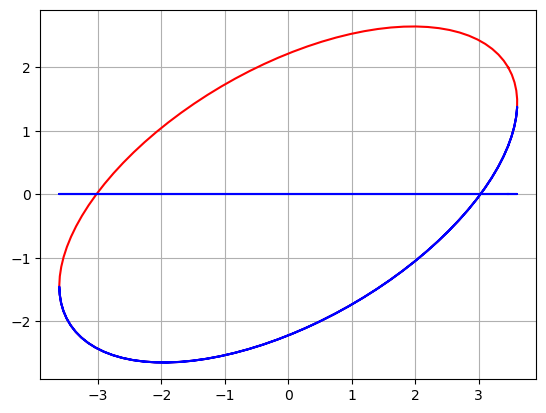

In [39]:
# 检查这个函数是否正确
def get_oval(noise_factor=0.1, num = 400, params=(0, 0, 4, 2, np.pi / 6)): 
    """获得带噪声的椭圆点"""

    # 定义椭圆参数
    center = (params[0], params[1])  # 椭圆中心
    width = params[2]        # 椭圆的长轴长度
    height = params[3]        # 椭圆的短轴长度
    angle = params[4]          # 椭圆的旋转角度（度数）

    # 生成椭圆的参数方程
    theta = np.linspace(0, np.pi*2, num)  # 角度范围
    x = center[0] + width * np.cos(theta)
    y = center[1] + height * np.sin(theta)

    # 添加随机噪声
    # noise_factor = 0.1  # 噪声因子，可以根据需要调整
    x += np.random.normal(0, noise_factor, x.shape)
    y += np.random.normal(0, noise_factor, y.shape)

    # 旋转椭圆
    # theta_rad = np.radians(angle)
    theta_rad = angle
    x_rotated = x * np.cos(theta_rad) - y * np.sin(theta_rad)
    y_rotated = x * np.sin(theta_rad) + y * np.cos(theta_rad)
    return x_rotated, y_rotated

def oval(x, p1, p2, a, b, t):
    c = np.cos(t)
    s = np.sin(t)
    aa = (s**2/a**2 + c**2/b**2)
    bb = 2*(x-p1)*c*s*(1/b**2-1/a**2)
    cc = (c**2/a**2+s**2/b**2)*(x-p1)**2-1
    if (bb**2 - 4*aa*cc).any() < 0:
        print(f'b-4ac {bb**2-4*aa*cc}')
        print(f'value is not good')
    return (-bb+np.sqrt(bb**2-4*aa*cc))/(2*aa)+p2
    # return np.zeros_like(x)

def oval2(x, p1, p2, a, b, t):
    c = np.cos(t)
    s = np.sin(t)
    aa = (s**2/a**2 + c**2/b**2)
    bb = 2*(x-p1)*c*s*(1/b**2-1/a**2)
    cc = (c**2/a**2+s**2/b**2)*(x-p1)**2-1
    if (bb**2 - 4*aa*cc).any() < 0:
        print(f'b-4ac {bb**2-4*a*c}')
        print(f'value is not good')
    return (-bb-np.sqrt(bb**2-4*aa*cc))/(2*aa)+p2


# def oval(x, p1, p2, a, b, t):
#     c = np.cos(t)
#     s = np.sin(t)
#     tt = np.tan(t)
#     aa = 1/(a**2*c**2)+1/b**2
#     bb = 2*(c**2*x-p1*c)/(a**2*c**2) - 2*(tt*x+p2)/b**2
#     cc = (c**2*x-p1*c)**2/(a**2*c**2)+(tt*x+p2)**2/b**2-1
#     if (bb**2 - 4*a*c).any() < 0:
#         print(f'b-4ac {bb**2-4*a*c}')
#         print(f'value is not good')
#     return (-bb+np.sqrt(bb**2-4*aa*cc))/2*a+p2

# def oval2(x, p1, p2, a, b, t):
#     c = np.cos(t)
#     s = np.sin(t)
#     tt = np.tan(t)
#     aa = 1/(a**2*c**2)+1/b**2
#     bb = 2*(c**2*x-p1*c)/(a**2*c**2) - 2*(tt*x+p2)/b**2
#     cc = (c**2*x-p1*c)**2/(a**2*c**2)+(tt*x+p2)**2/b**2-1
#     if (bb**2 - 4*a*c).any() < 0:
#         print(f'b-4ac {bb**2-4*a*c}')
#         print(f'value is not good')
#     return (-bb-np.sqrt(bb**2-4*aa*cc))/2*a+p2



x, y = get_oval(0, 100)
init_ = (0, 0, 4, 2, -np.pi/6)
y_pre = oval(x, *init_)
y_pre2 = oval2(x, *init_)
# print(f'shape x {x.shape} y {y.shape} y_pre {y_pre.shape}')
# print(f'dis {y_pre - y}')
plt.plot(x, y, color='red')
plt.plot(x, y_pre, color='blue')
plt.plot(x, y_pre2, color='blue')
plt.axis('equal')
plt.grid()
plt.show()



In [43]:
# GPT给的拟合和优化算法
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

# 定义椭圆方程
def ellipse(x, a, b, h, k):
    return k + np.sqrt(1 - (x - h)**2 / a**2) * b

# 生成模拟数据
np.random.seed(0)
x = np.linspace(-1, 1, 100)
y_true = ellipse(x, 2, 3, 0.5, 1)  # 真实的椭圆数据
y_noise = y_true + 0.1 * np.random.normal(size=len(x))  # 添加噪音

# 定义拟合函数
def residual(params, x, y):
    a, b, h, k = params
    return y - ellipse(x, a, b, h, k)

# 初始猜测值
initial_guess = [1, 1, 0, 0]

# 使用非线性最小二乘拟合
params_fit, _ = curve_fit(ellipse, x, y_noise, p0=initial_guess)

# 使用优化算法拟合
result = minimize(residual, initial_guess, args=(x, y_noise))

# 提取拟合参数
a_fit, b_fit, h_fit, k_fit = params_fit
a_opt, b_opt, h_opt, k_opt = result.x

# 绘制结果
plt.plot(x, y_noise, 'o', label='Noisy Data')
plt.plot(x, ellipse(x, a_fit, b_fit, h_fit, k_fit), label='Fitted (curve_fit)')
plt.plot(x, ellipse(x, a_opt, b_opt, h_opt, k_opt), label='Fitted (minimize)')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting Ellipse')
plt.show()



C:\Users\13430\AppData\Local\Temp\ipykernel_29676\1550470750.py:8: RuntimeWarning: invalid value encountered in sqrt
  return k + np.sqrt(1 - (x - h)**2 / a**2) * b


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

curve [(3.999126860289334, 0.00028934221154678855), (4.001032480914912, 0.014894857340380917), (3.9999977015157526, 0.03164275013403791), (3.997666352039255, 0.046235178146992455), (3.9972024955396352, 0.062107480763792716), (3.998000011180879, 0.07902613711129663), (3.996143015854977, 0.09246090268758543), (3.9937027575392645, 0.11068774012796147), (3.991887460678126, 0.12608746683514516), (3.9901699467365925, 0.1408468521275252), (3.9889178760336534, 0.1595242263576784), (3.9870473385075487, 0.17318310058161399), (3.9817840510656914, 0.18894694442515048), (3.9786428550314685, 0.2032087022229042), (3.975913224659691, 0.22038932132807612), (3.973778621325503, 0.23409996925570728), (3.9683902225532517, 0.24916329176015878), (3.9654579375095866, 0.26661777918371615), (3.9587409253444337, 0.28230606703358796), (3.956481314331785, 0.2992468472895407), (3.951031181809626, 0.31412318654899), (3.9455836327816605, 0.32982005144044135), (3.939050407045686, 0.342886385279005), (3.935554677260935

C:\Users\13430\AppData\Local\Temp\ipykernel_18672\580247523.py:31: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((1-(x[0]-p1)**2/a**2)*b**2)+p2


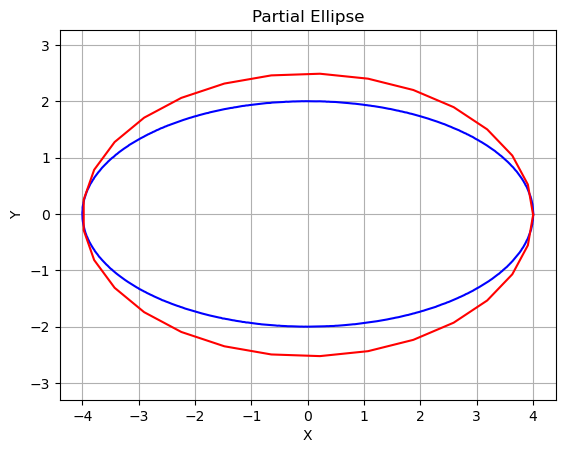

In [92]:
# 检测curve_fit的方式能不能拟合一个正确的椭圆,没有角度，尝试隐函数的拟合
"""首先画出带噪声的随机点，其次是画出拟合的图像
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def get_oval(noise_factor=0.1): 
    """获得带噪声的椭圆点"""
    # 定义椭圆参数
    center = (0.0, 0.0)  # 椭圆中心
    width = 4.0         # 椭圆的长轴长度
    height = 2.0        # 椭圆的短轴长度

    # 生成椭圆的参数方程
    theta = np.linspace(0, np.pi*2, 800)  # 角度范围
    x = center[0] + width * np.cos(theta)
    y = center[1] + height * np.sin(theta)

    # 添加随机噪声
    # noise_factor = 0.1  # 噪声因子，可以根据需要调整
    x += np.random.normal(0, noise_factor, x.shape)
    y += np.random.normal(0, noise_factor, y.shape)

    return x, y

def oval_model(x, p1, p2, a, b):
    """ 椭圆方程 t is radian, sin use"""
    # print(f'x {x[0]}')
    # print(f'y {x[1]}')
    return np.sqrt((1-(x[0]-p1)**2/a**2)*b**2)+p2
    
def find_oval(x, y):
    """拟合椭圆的过程"""
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    
    curve_pts = list(zip(x, y))
    print(f'curve {curve_pts}')

    # init_guess = (x_max, y_max, x_max-x_min, (y_max-y_min)*2, 0)
    # params_bounds = ([x_min, y_max, x_max - x_min, 1*(y_max-y_min),0], [x_max+200, y_max+400, 3*(x_max-x_min), 10*(x_max- x_min), np.pi / 2])
    init_guess = (0, 0, 4, 2)
    params_bounds = ([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
    params, _ = curve_fit(oval_model, x, y, p0=init_guess, bounds=params_bounds)

    # draw the ellipse
    # 生成角度值
    theta = np.linspace(0, 2*np.pi, 30)

    # 计算椭圆上每个点的坐标
    p0, p1 = params[0], params[1]
    a, b = params[2], params[3] #+ np.pi/2
    print(f'p0 {p0} p1 {p1}')
    print(f'a {a} b {b}')

    x = p0 + a * np.cos(theta)
    y = p1 + b * np.sin(theta)

    # x = x * np.cos(t) - y * np.sin(t)
    # y = x * np.sin(t) + y * np.cos(t)
    # x = p0 + a * np.cos(theta) * np.cos(t) + b * np.sin(theta) * np.sin(t)
    # y = p1 - a * np.cos(theta) * np.sin(t) + b * np.sin(theta) * np.cos(t)
    # x = p0 + a * np.cos(theta) * np.cos(t) + b * np.sin(theta) * np.sin(t) 
    # y = p1 - a * np.cos(theta) * np.sin(t) - b * np.sin(theta) * np.cos(t) 

    return x, y

x_rotated, y_rotated = get_oval(0.001)
# x_rotated, y_rotated = x_rotated[:100], y_rotated[:100]
x_f, y_f = find_oval(x_rotated, y_rotated)

plt.plot(x_rotated, y_rotated, c="blue")
plt.plot(x_f, y_f, c="red")
plt.axis('equal')  # 保持坐标轴刻度相等，避免椭圆被扭曲
plt.title('Partial Ellipse')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


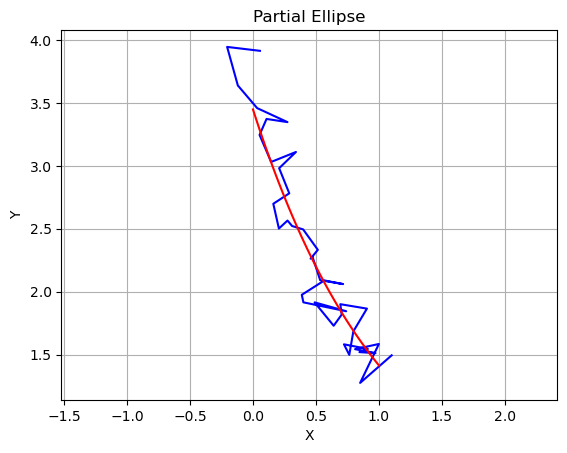

In [29]:
# 检测curve_fit的方式能不能拟合一个正确的椭圆,没有角度，尝试隐函数的拟合
"""首先画出带噪声的随机点，其次是画出拟合的图像
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def get_oval(noise_factor=0.1, params=(3, 2, 1)): 
    """获得带噪声的椭圆点，当下面用极坐标的形式，这里也应该用同样的方式 """
    # 生成椭圆的参数方程
    a, b, c = params

    x = np.linspace(0, 1, 40)  # 角度范围
    y = a * np.exp(-b * x) + c

    # 添加随机噪声
    # noise_factor = 0.1  # 噪声因子，可以根据需要调整
    x += np.random.normal(0, noise_factor, x.shape)
    y += np.random.normal(0, noise_factor, y.shape)

    return x, y

def oval_model(x, a, b, c):
    """ 椭圆方程 t is radian, sin use"""
    return a * np.exp(-b * x) + c
    
def find_oval(x, y):
    """拟合椭圆的过程"""
    curve_pts = list(zip(x, y))
    # init_guess = (x_max, y_max, x_max-x_min, (y_max-y_min)*2, 0)
    # params_bounds = ([x_min, y_max, x_max - x_min, 1*(y_max-y_min),0], [x_max+200, y_max+400, 3*(x_max-x_min), 10*(x_max- x_min), np.pi / 2])
    init_guess = (3, 2, 1)
    params_bounds = ([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
    params, _ = curve_fit(oval_model, x, y, p0=init_guess, bounds=params_bounds)

    # draw the ellipse
    # 生成角度值
    x = np.linspace(0, 1, 40)

    # 计算椭圆上每个点的坐标
    a, b, c = params

    y = a * np.exp(-b * x) + c

    # x = x * np.cos(t) - y * np.sin(t)
    # y = x * np.sin(t) + y * np.cos(t)
    # x = p0 + a * np.cos(theta) * np.cos(t) + b * np.sin(theta) * np.sin(t)
    # y = p1 - a * np.cos(theta) * np.sin(t) + b * np.sin(theta) * np.cos(t)
    # x = p0 + a * np.cos(theta) * np.cos(t) + b * np.sin(theta) * np.sin(t) 
    # y = p1 - a * np.cos(theta) * np.sin(t) - b * np.sin(theta) * np.cos(t) 

    return x, y

x_rotated, y_rotated = get_oval(0.1)
# x_rotated, y_rotated = x_rotated[:100], y_rotated[:100]
x_f, y_f = find_oval(x_rotated, y_rotated)

plt.plot(x_rotated, y_rotated, c="blue")
plt.plot(x_f, y_f, c="red")
plt.axis('equal')  # 保持坐标轴刻度相等，避免椭圆被扭曲
plt.title('Partial Ellipse')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


p0 1.9524558879489404; p1 7.284884656482646
x_f [-0.07114043 -0.07759725  0.10935012 -0.1980093   0.03117747 -0.07473892
  0.24914315  0.13317429 -0.01788763  0.13016317  0.06023459  0.12348786
 -0.01711587  0.05919369 -0.19992882 -0.05160472  0.05463969  0.15319916
  0.02319498 -0.0036841   0.15551236 -0.03674655  0.08311263 -0.09572664
  0.2503207   0.09335256  0.14785189 -0.15800064 -0.07288786 -0.04332846]
y_f [ 0.32642072  0.16066619  0.3530141   0.31008315  0.17867934  0.35460136
  0.27176513  0.14664161  0.30463973  0.11633439  0.21387178  0.18959089
  0.20285141  0.22968214  0.27799224  0.30917707  0.11534151  0.01204236
  0.35459284  0.13039228  0.03456264 -0.0085166  -0.06146593 -0.09257344
  0.04530129 -0.05078145 -0.13831924 -0.03592721 -0.08567962 -0.09958043]


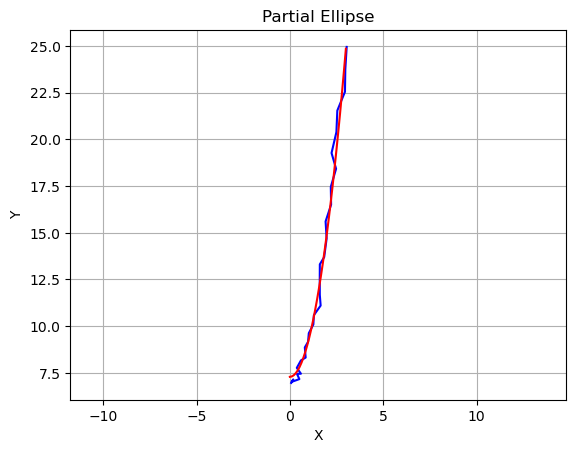

In [33]:
# 检测curve_fit的方式能不能拟合一个正确的椭圆
# 按函数定义是分成independent data & dependent data, and there would be eps.
"""首先画出带噪声的随机点，其次是画出拟合的图像
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def get_oval(noise_factor=0.1): 
    p1 = 2
    p2 = 7
    x = np.linspace(0, 3, 30)
    y = p1 * x ** 2 + p2
    x += np.random.normal(0, noise_factor, x.shape)
    y += np.random.normal(0, noise_factor, y.shape)
    x_rotated = x
    y_rotated = y
    return x_rotated, y_rotated

def oval_model(x, p1, p2):
    """ 椭圆方程，t is radian, sin use"""
    return p1 * x ** 2 + p2
    
def find_oval(x, y):
    """拟合椭圆的过程"""
    init_guess = (200, 71)
    params_bounds = ([-np.inf, -np.inf], [np.inf, np.inf])
    params, _ = curve_fit(oval_model, x, y, p0=init_guess, bounds=params_bounds)

    # 计算椭圆上每个点的坐标
    p0, p1 = params
    print(f'p0 {p0}; p1 {p1}')
    x = np.linspace(0, 3, 30)
    y = p0 * x ** 2 + p1
    return x, y

x_rotated, y_rotated = get_oval(0.1)
# print(f'x_rotated {x_rotated}')
# print(f'y_rotated {y_rotated}')
# x_rotated, y_rotated = x_rotated[:100], y_rotated[:100]
x_f, y_f = find_oval(x_rotated, y_rotated)
print(f'x_f {x_f-x_rotated}')
print(f'y_f {y_f-y_rotated}')

plt.plot(x_rotated, y_rotated, c="blue")
plt.plot(x_f, y_f, c="red")
plt.axis('equal')  # 保持坐标轴刻度相等，避免椭圆被扭曲
plt.title('Partial Ellipse')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


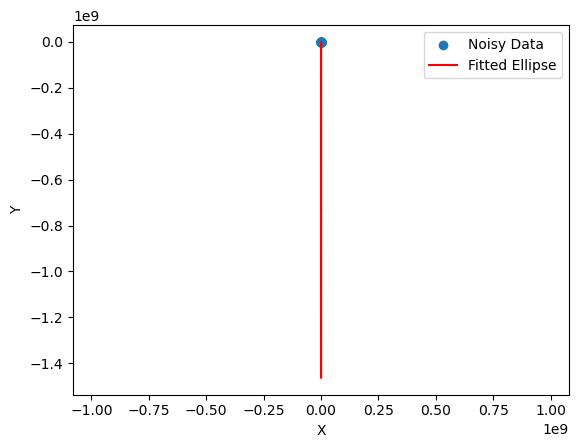

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义椭圆的参数化方程
def ellipse(x, a, b, h, k):
    return np.sqrt((x[0] - h)**2 / a**2 + (x[1] - k)**2 / b**2)

# 生成带噪声的椭圆数据点
a_true = 3.0
b_true = 2.0
h_true = 1.0
k_true = 2.0
noise_level = 0.1
num_points = 50

theta = np.linspace(0, 2*np.pi, num_points)
x_data = h_true + a_true * np.cos(theta) + np.random.normal(0, noise_level, num_points)
y_data = k_true + b_true * np.sin(theta) + np.random.normal(0, noise_level, num_points)

data = np.array([x_data, y_data])

# 使用 curve_fit 拟合数据
params, covariance = curve_fit(ellipse, data, np.ones(num_points), p0=[1, 1, 0, 0])

# 提取拟合的参数
a_fit, b_fit, h_fit, k_fit = params

# 绘制拟合结果
plt.scatter(x_data, y_data, label='Noisy Data')
theta_fit = np.linspace(0, 2*np.pi, 100)
x_fit = h_fit + a_fit * np.cos(theta_fit)
y_fit = k_fit + b_fit * np.sin(theta_fit)
plt.plot(x_fit, y_fit, label='Fitted Ellipse', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()


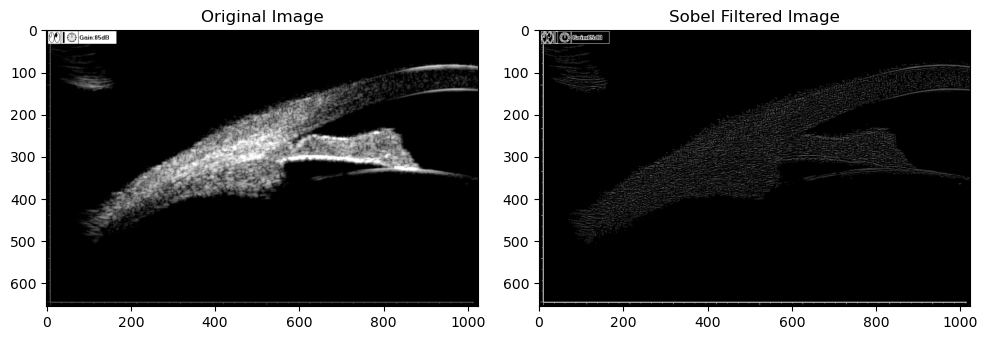

In [2]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# Load the BMP image
image_path = './2019-10-12-01/4.bmp'  # Replace with the path to your BMP image
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Apply Sobel filter along the vertical axis
sobel_image = gray_image.filter(ImageFilter.FIND_EDGES)

# Convert the PIL Image to a NumPy array
sobel_array = np.array(sobel_image)

# Display the original and Sobel-filtered images using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sobel_array, cmap='gray')
plt.title('Sobel Filtered Image')

plt.tight_layout()
plt.show()

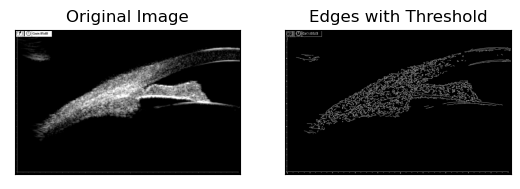

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('./2019-10-12-01/4.bmp', cv2.IMREAD_GRAYSCALE)

# 进行 Canny 边缘检测
edges = cv2.Canny(image, threshold1=150, threshold2=250)

# 将大于阈值的边缘展示出来
edges_with_threshold = np.where(edges > 0, 255, 0).astype(np.uint8)

# 显示结果
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(edges_with_threshold, cmap='gray')
plt.title('Edges with Threshold'), plt.xticks([]), plt.yticks([])
plt.show()


In [2]:
import cv2

# 读取图像
image_path = 'D:/SUSTech_A/科研/医院合作/悬韧带/测试/2019-10-12-01/4.bmp'  # 替换为你的图像路径
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 边缘检测
edges = cv2.Canny(image, threshold1=100, threshold2=200)  # 调整阈值

# 获取大于一定阈值的边缘
high_threshold = 150  # 设定高阈值
edges_high = (edges >= high_threshold)

# 展示边缘图像
# cv2.imshow('Edges', edges_high.astype('uint8') * 255)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 保存边缘图像
output_path = 'output_edges.jpg'  # 替换为输出图像路径
cv2.imwrite(output_path, edges_high.astype('uint8') * 255)


TypeError: '>=' not supported between instances of 'NoneType' and 'int'

In [3]:
import cv2

image_path = r'D:\SUSTech_A\科研\医院合作\悬韧带\测试\2019-10-12-01\4.bmp'  # 替换为你的图像路径，使用原始字符串避免转义字符问题

# 检查图像文件是否存在
try:
    with open(image_path, 'rb'):
        pass
except FileNotFoundError:
    print("图像文件不存在：", image_path)
    exit()

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("无法打开图像：", image_path)
    exit()

# 进一步处理图像...



无法打开图像： D:\SUSTech_A\科研\医院合作\悬韧带\测试\2019-10-12-01\4.bmp


: 

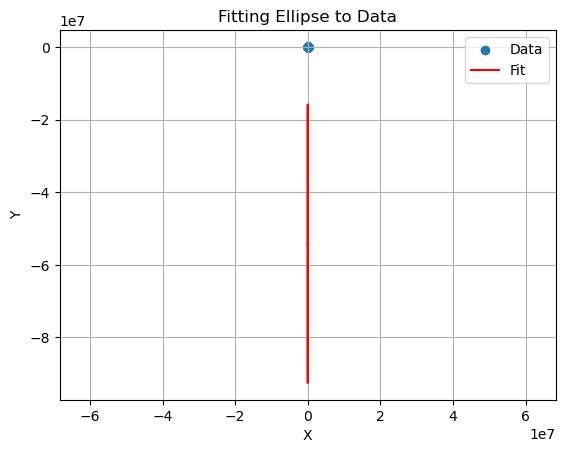

拟合结果：
椭圆中心 (h, k): (-3.020, -54205174.255)
半长轴和半短轴 (a, b): (-13506.389, -38328847.025)


In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义椭圆方程
def ellipse(x, h, k, a, b):
    return ((x[0] - h) ** 2 / a ** 2) + ((x[1] - k) ** 2 / b ** 2) - 1

# 生成示例散点数据 (x, y)
np.random.seed(0)
num_points = 100
x_data = np.random.uniform(-5, -1, num_points)  # 在第二象限生成 x 坐标
y_data = np.sqrt(1 - ((x_data + 3) ** 2) / 9) + np.random.normal(0, 0.1, num_points)  # 根据椭圆方程生成对应的 y 坐标

# 初始猜测值
initial_guess = (-3, 1, 3, 2)

# 拟合椭圆
params, _ = curve_fit(ellipse, (x_data, y_data), np.ones(num_points), p0=initial_guess)

# 提取拟合参数
h_fit, k_fit, a_fit, b_fit = params

# 绘制拟合结果
plt.scatter(x_data, y_data, label='Data')
theta = np.linspace(0, 2*np.pi, 100)
x_fit = h_fit + a_fit * np.cos(theta)
y_fit = k_fit + b_fit * np.sin(theta)
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting Ellipse to Data')
plt.grid()
plt.axis('equal')
plt.show()

print("拟合结果：")
print(f"椭圆中心 (h, k): ({h_fit:.3f}, {k_fit:.3f})")
print(f"半长轴和半短轴 (a, b): ({a_fit:.3f}, {b_fit:.3f})")


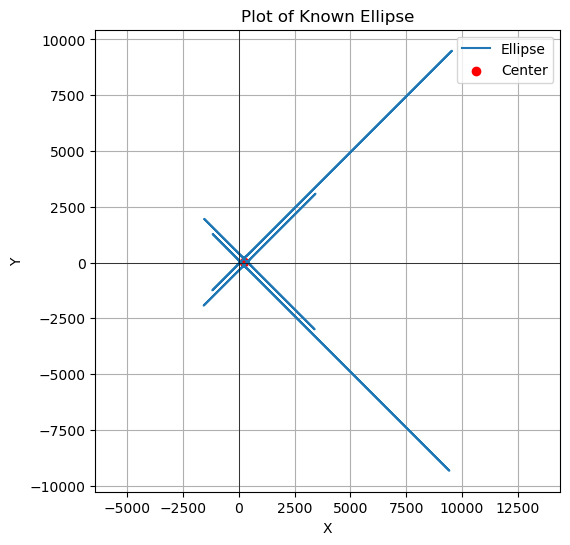

In [35]:
import numpy as np
import matplotlib.pyplot as plt
params = "2.25338336e+02 2.55684021e+01 2.09644086e+02 4.29629299e+01\
 2.97210455e-02".split()
params = [float(i) for i in params]
# 定义椭圆方程的参数
p0 = params[0]   # 中心 x 坐标
p1 = params[1]   # 中心 y 坐标
a = params[2]   # 半长轴
b = params[3]   # 半短轴
# t = np.pi/2-params[4]
t = params[4]

# 生成角度值
theta = np.linspace(0, 2*np.pi, 100)

# 计算椭圆上每个点的坐标
# x = h + a * np.cos(theta) * np.cos(t) + b * np.sin(theta) * np.sin(t)
# y = k + a * np.cos(theta) * np.sin(t) + b * np.sin(theta) * np.cos(t)
x = h + a * np.cos(theta) * np.sin(t) + b * np.sin(theta) * np.cos(t)
y = k + a * np.cos(theta) * np.cos(t) + b * np.sin(theta) * np.sin(t)
# x = (a*np.cos(t)+p0*np.cos(theta) - (b*np.sin(t)+p0*np.sin(theta))*np.tan(theta)) / ((np.cos(theta)**2 - np.sin(theta)**2) / np.cos(theta)) 
# y = (b*np.sin(t) - (x - p0)*np.sin(theta)) / np.cos(theta) + p1
# x = h + a * np.cos(theta)
# y = k + b * np.sin(theta)

# 绘制椭圆
plt.figure(figsize=(6, 6))
plt.plot(x, y, label='Ellipse')
plt.scatter(p0, p1, color='red', label='Center')  # 标记中心点
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Known Ellipse')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()


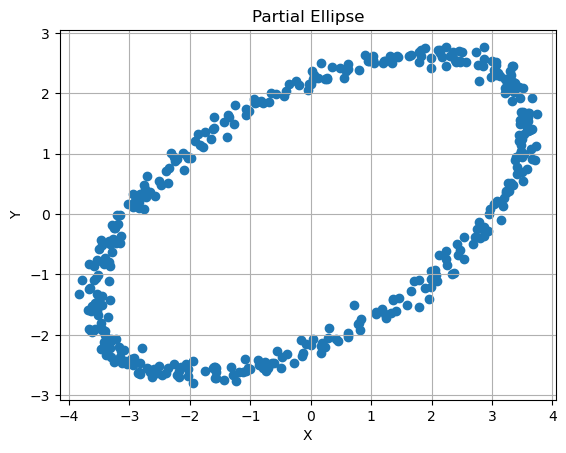

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def get_oval(noise_factor=0.1): 
    # 定义椭圆参数
    center = (0.0, 0.0)  # 椭圆中心
    width = 4.0         # 椭圆的长轴长度
    height = 2.0        # 椭圆的短轴长度
    angle = 30          # 椭圆的旋转角度（度数）

    # 生成椭圆的参数方程
    theta = np.linspace(0, np.pi*2, 400)  # 角度范围
    x = center[0] + width * np.cos(theta)
    y = center[1] + height * np.sin(theta)

    # 添加随机噪声
    # noise_factor = 0.1  # 噪声因子，可以根据需要调整
    x += np.random.normal(0, noise_factor, x.shape)
    y += np.random.normal(0, noise_factor, y.shape)

    # 旋转椭圆
    theta_rad = np.radians(angle)
    x_rotated = x * np.cos(theta_rad) - y * np.sin(theta_rad)
    y_rotated = x * np.sin(theta_rad) + y * np.cos(theta_rad)
    return x_rotated, y_rotated

# x_rotated, y_rotated = get_oval()
# # 绘制部分椭圆
# plt.scatter(x_rotated, y_rotated)
# plt.axis('equal')  # 保持坐标轴刻度相等，避免椭圆被扭曲
# plt.title('Partial Ellipse')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.grid()
# plt.show()


In [30]:
def oval_model(x, p1, p2, a, b, t):
    """ t is radian, sin use"""
    return ((x[0]-p1)*np.sin(t)+(x[1]-p2)*np.cos(t))**2 / b ** 2 + \
    (-(x[0]-p1)*np.cos(t)+(x[1]-p2)*np.sin(t))**2 / a ** 2 - 1
    
def find_oval(x, y):

    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    
    curve_pts = list(zip(x, y))
    print(f'curve {curve_pts}')

    # init_guess = (x_max, y_max, x_max-x_min, (y_max-y_min)*2, 0)
    # params_bounds = ([x_min, y_max, x_max - x_min, 1*(y_max-y_min),0], [x_max+200, y_max+400, 3*(x_max-x_min), 10*(x_max- x_min), np.pi / 2])
    init_guess = (0, 0, 3, 3, 0)
    params_bounds = ([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf])
    params, _ = curve_fit(oval_model, x, y, p0=init_guess, bounds=params_bounds)
    print(f'find the params {params} var {_}')

    # draw the ellipse
    # 生成角度值
    theta = np.linspace(0, 2*np.pi, 100)

    # 计算椭圆上每个点的坐标
    p0, p1 = params[0], params[1]
    a, b, t = params[2], params[3], params[4] #+ np.pi/2

    x = p0 + a * np.cos(theta)
    y = p1 + b * np.sin(theta)

    x = x * np.cos(t) - y * np.sin(t)
    y = x * np.sin(t) + y * np.cos(t)
    x = p0 + a * np.cos(theta) * np.cos(t) + b * np.sin(theta) * np.sin(t)
    y = p1 - a * np.cos(theta) * np.sin(t) + b * np.sin(theta) * np.cos(t)

    return x, y


curve [(3.464101615137755, 1.9999999999999998), (3.4479254319628385, 2.027026077819402), (3.4308942552437807, 2.053549507236296), (3.413012308258153, 2.0795637111476193), (3.3942840252518605, 2.1050622387246523), (3.374714050339569, 2.130038767012652), (3.354307236353087, 2.154487102498776), (3.333068643637992, 2.1784011826479093), (3.3110035387988033, 2.201775077406011), (3.288117393393001, 2.2246029906706086), (3.2644158825742258, 2.246879261728078), (3.239904883684996, 2.26859836665735), (3.214590474799279, 2.2897549196996927), (3.1884789332152916, 2.3103436745942387), (3.1615767338989023, 2.3303595258789174), (3.133890547878006, 2.3497975101564723), (3.105427240588291, 2.368652807325252), (3.0761938701707914, 2.3869207417744667), (3.04619768572166, 2.404596783543615), (3.0154461254945817, 2.421676549445793), (2.983946815056289, 2.4381558041546083), (2.9517075653956213, 2.454030461254427), (2.91873637098661, 2.469296584253697), (2.885041407806061, 2.4839503875610927), (2.85063103130

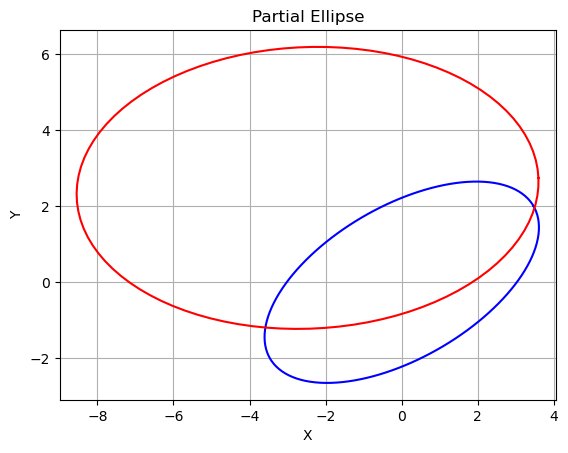

In [31]:
x_rotated, y_rotated = get_oval(0)
# x_rotated, y_rotated = x_rotated[:100], y_rotated[:100]
x_f, y_f = find_oval(x_rotated, y_rotated)

plt.plot(x_rotated, y_rotated, c="blue")
plt.plot(x_f, y_f, c="red")
plt.axis('equal')  # 保持坐标轴刻度相等，避免椭圆被扭曲
plt.title('Partial Ellipse')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


params [-25.70469346   1.55713851   1.54079355  -0.92024759   6.0044799 ]
x (100,) y ()


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

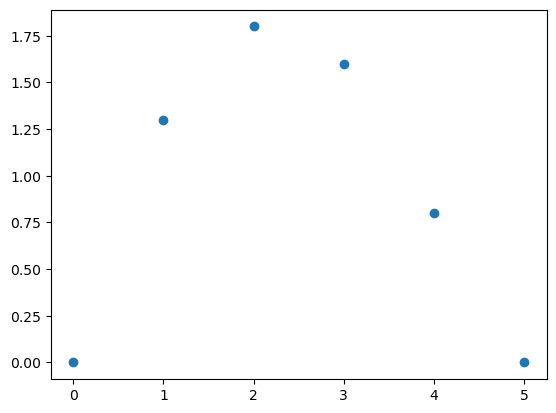

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义倾斜椭圆方程
def rotated_ellipse(x, a, b, h, k, theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    x_rot = (x[0] - h) * cos_theta + (x[1] - k) * sin_theta
    y_rot = -(x[0] - h) * sin_theta + (x[1] - k) * cos_theta
    return np.sqrt((x_rot / a)**2 + (y_rot / b)**2)

# 给定部分椭圆的点
x_data = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y_data = np.array([0.0, 1.3, 1.8, 1.6, 0.8, 0.0])

# 初始参数猜测
initial_guess = (3.0, 2.0, 0.0, 0.0, np.radians(30))  # 注意：将角度转换为弧度

# 拟合倾斜椭圆方程
params, covariance = curve_fit(rotated_ellipse, x_data, y_data, p0=initial_guess)

# 得到拟合后的参数
print(f'params {params}')
a_fit, b_fit, h_fit, k_fit, theta_fit = params

# 生成拟合后的曲线
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = rotated_ellipse(x_fit, a_fit, b_fit, h_fit, k_fit, theta_fit)

print(f'x {x_fit.shape} y {y_fit.shape}')

# 绘制原始点和拟合后的椭圆曲线
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_fit, y_fit, label='Fitted Rotated Ellipse')
plt.legend()
plt.title('Fitting Rotated Partial Ellipse')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


In [56]:
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

def fit_oval(x_t):
    reg = LsqEllipse().fit(x_t)
    p, a, b, t = reg.as_parameters()
    p, a, b, t = (abs(p[0]), abs(p[1])), abs(a), abs(b), abs(t)
    print(f'center: {p[0]:.3f}, {p[1]:.3f} (0, 0)')
    print(f'width: {a:.3f} 4')
    print(f'height: {b:.3f} 2')
    print(f'phi: {t:.3f} {np.deg2rad(30)}')
    ellipse = Ellipse(
    xy=p, width=2*a, height=2*b, angle=np.rad2deg(t),
    edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
    )
    return ellipse

# fig = plt.figure(figsize=(6, 6))
# ax = plt.subplot()
# ax.axis('equal')
# ax.plot(x_noise, y_noise, 'ro', zorder=1)
# ellipse = Ellipse(
#     xy=p, width=2*a, height=2*b, angle=np.rad2deg(t),
#     edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
# )
# print(f'ellipse {ellipse}')
# print(f'ellpise type {type(ellipse)}')
# ax.add_patch(ellipse)

# plt.xlabel('$X_1$')
# plt.ylabel('$X_2$')

# plt.legend()
# plt.show()

In [55]:
a = "(163, 4);(164, 4);(163, 4);(157, 4);(147, 4);(140, 4);(143, 5);(156, 5);(176, 6);(198, 6);(218, 7);(235, 8);(247, 9);(257, 9);(265, 10);(272, 11);(279, 12);(285, 13);(290, 14);(296, 14);(301, 15);(306, 16);(310, 17);(315, 18);(320, 19);(324, 19);(328, 20);(332, 21);(336, 22);(340, 23);(343, 23);(346, 24);(348, 25);(350, 25);(351, 25);(352, 25);(351, 25);(350, 25);(348, 25);(346, 24);(343, 23);(340, 23);(336, 22);(332, 21);(328, 20);(324, 19);(319, 19);(315, 18);(310, 17);(305, 16);(300, 15);(295, 15);(289, 14);(283, 13);(276, 12);(268, 11);(259, 11);(249, 10);(236, 9);(223, 9);(208, 9);(192, 8);(177, 8);(162, 8);(148, 8);(137, 8);(127, 8);(120, 8);(113, 8);(108, 8);(103, 8);(99, 8);(95, 8);(90, 9);(86, 9);(81, 9);(77, 10);(72, 11);(67, 11);(63, 12);(58, 13);(54, 14);(50, 15);(45, 15);(42, 16);(38, 17);(36, 17);(35, 17);(36, 17);(38, 17);(42, 16);(46, 15);(50, 15);(54, 14);(59, 13);(63, 12);(67, 11);(71, 10);(75, 10);(79, 9)"

In [57]:
import numpy as np
def get_x(tur):
    return tur[0]

def str2arr(line):
    arr = line.split(';')
    arr = [a.strip("()").split(',') for a in arr]
    arr = [(int(a[0]), int(a[1])) for a in arr]
    arr = sorted(arr, key=get_x)
    x = [a[0] for a in arr]
    y = [a[1] for a in arr]
    return x, y

[(35, 17), (36, 17), (36, 17), (38, 17), (38, 17), (42, 16), (42, 16), (45, 15), (46, 15), (50, 15), (50, 15), (54, 14), (54, 14), (58, 13), (59, 13), (63, 12), (63, 12), (67, 11), (67, 11), (71, 10), (72, 11), (75, 10), (77, 10), (79, 9), (81, 9), (86, 9), (90, 9), (95, 8), (99, 8), (103, 8), (108, 8), (113, 8), (120, 8), (127, 8), (137, 8), (140, 4), (143, 5), (147, 4), (148, 8), (156, 5), (157, 4), (162, 8), (163, 4), (163, 4), (164, 4), (176, 6), (177, 8), (192, 8), (198, 6), (208, 9), (218, 7), (223, 9), (235, 8), (236, 9), (247, 9), (249, 10), (257, 9), (259, 11), (265, 10), (268, 11), (272, 11), (276, 12), (279, 12), (283, 13), (285, 13), (289, 14), (290, 14), (295, 15), (296, 14), (300, 15), (301, 15), (305, 16), (306, 16), (310, 17), (310, 17), (315, 18), (315, 18), (319, 19), (320, 19), (324, 19), (324, 19), (328, 20), (328, 20), (332, 21), (332, 21), (336, 22), (336, 22), (340, 23), (340, 23), (343, 23), (343, 23), (346, 24), (346, 24), (348, 25), (348, 25), (350, 25), (350,

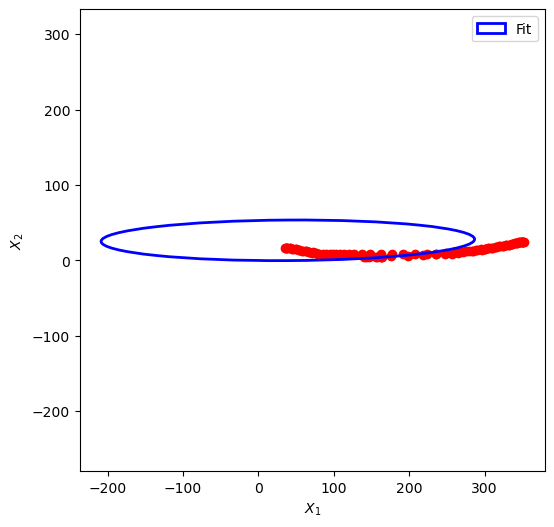

In [63]:
x, y = str2arr(a)
x_t_list = list(zip(x, y))
x_t_new_list = list()
pre = 0
for i in x_t_list:
    if i[0] == pre:
        continue
    pre = i[0]
    x_t_new_list.append(i)
print(x_t_new_list)
x_t = np.array(x_t_new_list)

ellipse = fit_oval(x_t)
print(x_t.shape)

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.axis('equal')
ax.plot(x, y, 'ro', zorder=1)

ax.add_patch(ellipse)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.legend()
plt.show()

# 为什么这里的拟合会有偏差

In [11]:
import random

[(3.143723067114319, 70.01480017635278), (2.8691197179398396, 74.54209202467389), (2.2998578669023773, 76.91513696018995), (2.444455352549483, 76.78549110346955), (3.294508231377731, 66.88193649679782), (2.464841436075478, 76.7707982246727), (3.3051715069074206, 66.6841523170012), (2.7248111614216324, 76.44278195688553), (2.906018162471933, 74.05799437474141), (3.3951119986144707, 65.04842366975456), (3.413586225781857, 59.272952541094256), (3.1777998692559084, 66.55260468029941), (1.8727247990162632, 79.99993506376896), (2.1668245144931464, 79.99675326641065), (2.730970425868828, 76.23980818419102), (2.554153066918961, 77.82693236593542), (2.9098097336761426, 73.86100342474204), (2.8731882844404644, 74.60239991596846), (3.394685157464016, 62.240347525978855), (2.451945695199102, 79.91751952535292), (2.596427744978736, 77.90271253911877), (2.5645747101863154, 78.46370096566739), (2.3927824610264943, 78.85884093463984), (2.0884582531889633, 77.84627328359801), (2.387977115172247, 78.565

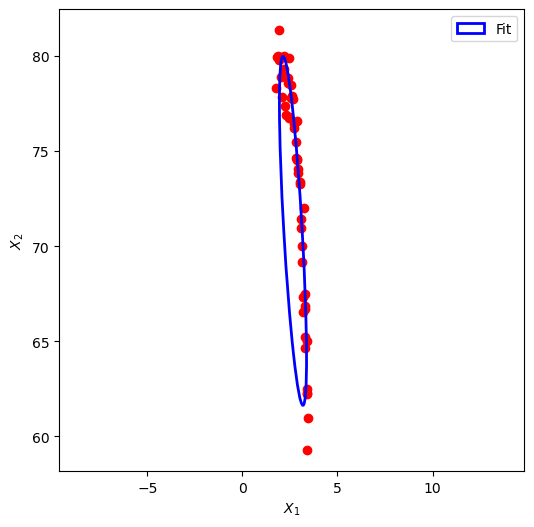

In [51]:
# 下面说明了点的位置混乱不影响椭圆的正确拟合
x_noise, y_noise = get_oval(0.04)
nums = 50
x_noise, y_noise = x_noise[:nums], y_noise[:nums] * 30

x_t_list = list(zip(x_noise, y_noise))
random.shuffle(x_t_list)
print(x_t_list)
x_t = np.array(x_t_list)

ellipse = fit_oval(x_t)

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.axis('equal')
ax.plot(x_noise, y_noise, 'ro', zorder=1)

ax.add_patch(ellipse)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.legend()
plt.show()

# # x_rotated, y_rotated = get_oval()
# # 绘制部分椭圆
# plt.scatter(x_noise, y_noise)
# plt.axis('equal')  # 保持坐标轴刻度相等，避免椭圆被扭曲
# plt.title('Partial Ellipse')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.grid()
# plt.show()

In [65]:
import cv2
import numpy as np

# 生成随机的椭圆点数据
n_points = 100
major_axis = 5
minor_axis = 3
angle = 30
center_x = 10
center_y = 10

theta = np.linspace(0, 2*np.pi, n_points)
x = center_x + major_axis * np.cos(theta)
y = center_y + minor_axis * np.sin(theta)

points = np.column_stack((x, y))
print(points.shape)

# 拟合椭圆
ellipse = cv2.fitEllipse(points)

# 获取拟合的椭圆参数
(center, axes, angle) = ellipse
print("Center:", center)
print("Axes:", axes)
print("Angle:", angle)


(100, 2)


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:355: error: (-215:Assertion failed) n >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::fitEllipseNoDirect'
